In [1]:
# Les algorithmes de machine Learning apprennent à partir des données qui leur sont fournies

## Par conséquent si ces données sont erronées, incomplètes, redondantes, alors l'algo sera mauvais

### Il est donc impératif de bien préparer nos données (filtrer / Nettoyer / Normaliser)


In [2]:
import matplotlib.pyplot as plt

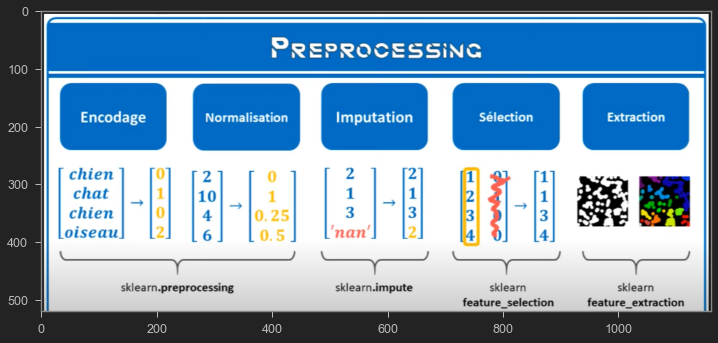

In [3]:
image = plt.imread('Pre_Process.png')
plt.figure(figsize=(12,9))
plt.imshow(image)

# Le prepocessing consiste donc en ces deux première étapes. Encodage & Normalisation

# 1) Encodage 

In [4]:
# Transformer les données qualitatives en valeurs numériques


# 2) Normalisation 

In [5]:
# Permet de mettre sur une même échelle toutes les variables quantitatives ce qui facilite bcp l'apprentissage de la machine


# 3) Imputation

In [6]:
# Permet de remplacer les données manquantes par certaines valeures statistiques


# 4) Selection

In [7]:
# Utilise les test statistiques (ex:Khi-deux) pour selectionner les variables les plus utiles pour le développement d'un modèle


# 5) Extraction 

In [8]:
# Consiste à générer de nouvelles variables à partir d'informations cachées dans le Dataset


# Le module Pre_Processing (Encodage & Normalisation)

## Classes Transformers

In [9]:
# Les 'Transformeurs de Class" offrent une interface de programmation extrêmement utile pour faire du pre_processing

## Ils permettent de traiter l'ensemble de nos données de façon cohérente en transformant toute données futures de la manière qu'ont 
## été transformées les données qui ont servi à l'entrainement

### Cela permet au modèle de Machine Learning qui vient après le "transformer" de bien fonctionner car il reçoit des données
### cohérentes avec ce qu'il a appris


In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [11]:
Y = np.array(['Chat',
             'Chient',
             'Chat',
             'Oiseau'])

# Ce module 'Transformer' consiste en deux méthode


### 1_ 'fit'

In [12]:
# Une méthode 'fit' qui permet de déveloper une fonction de transformation en analysant les données du Train_Set


In [13]:
encoder = LabelEncoder()
encoder.fit(Y)


LabelEncoder()

### 2_ 'transform'

In [14]:
# Une méthode 'Transform' qui permet d'appliquer cette fonction de transformation sur toutes les données qu'on lui fournit
# càd aussi bien les données du Train_Set, que les données de Test_Set, que des données futures


In [15]:
encoder.transform(Y)


array([0, 1, 0, 2], dtype=int32)

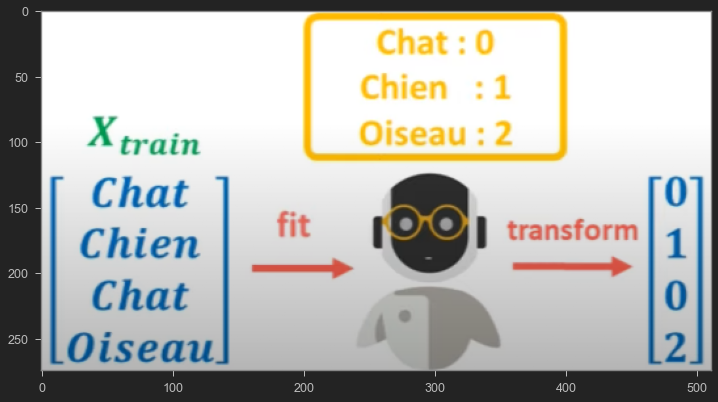

In [16]:
image = plt.imread('Transformer.png')
plt.figure(figsize=(12,9))
plt.imshow(image)

### 3_ "fit_transform"

In [17]:
encoder.fit_transform(Y)

# On peut faire les deux en même temps avec cette fonction : 


array([0, 1, 0, 2], dtype=int32)

### Dans la pratique

In [18]:
# Quand on désire développer un modèle de ML on commence par diviser notre datset en deux parties, un Train_set & un Test_Set

## Avec les données du Train_Set, on développe une fonction de transformation ce qui permet de traiter nos données

### Pour ensuite entraîner un estimateur.

#### On peut alors utliser ce transformateur et cet estimateur tels qu'ils ont été développés pour transformer les données du Test_Set

##### Pour enfin faire de nouvelles prédictions

###### En combiant ainsi un transformer et un estimateur, nous obtenon alors une PIPELINE, càd une chaîne de transformation


# Les différents "transformer" du modèle "Pre_Processing"

## Les 'transformer' d'Encodage

In [19]:
# En ML, il est nécessaire de présenter à la machine des valeurs numériques

## Il existe 5 'transformer' d'encodage dans Sklearn

### Il permettent d'effectuer deux type d'Encodage


### A) L'encodage Ordinale

In [20]:
# Consiste à associer chaque catégorie d'une variable à une valeur décimale unique

## On utilise alors "label_encododer" ou "Ordinal Encoder"


#### Label Encoder 

In [21]:
encoder.fit_transform(Y)

# Conçu pour encoder la variable y 

## En principe, il ne permet donc de ne traiter qu'une seule colonne [ Voir exemple plus haut]


array([0, 1, 0, 2], dtype=int32)

In [22]:
# Une fois le modèle estimé, pour récuper les 'clès' de ces valeurs numériques, on peut appliquer la 'inverse_transform'


In [23]:
encoder.inverse_transform(np.array([0,1,0,2]))

array(['Chat', 'Chient', 'Chat', 'Oiseau'], dtype='<U6')

#### Ordinale Encoder

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
# Afin d'encoder un tableau avec plusieurs variables

## Il fait exactement la même chose que Label_Encoder, mais pour les X

X = np.array([['Chien', 'Chat'],
    ['Oiseau', 'Chat'],
    ['Chien', 'Oiseau']])

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [26]:
# Un problème est que ces catégories n'ont rien 'd'ordinale"

## Ici, par ex, un chien vaut 0 et un oiseau 1, mais peut-on dire qu'un chien est inférieur à un oiseau ? 

### Cela risque de pénaliser la plupart de nos modèles de ML à l'exception des Random Forest (car non sensible aux relations d'ordres)


### B) L'encodage Non-Ordinale ~ OneHot

In [27]:
# Chaque catégorie est alors représentée de manière binaire dans une colonne qui lui est propre

## On décompose ainsi la variable initiale en plusieurs sous-variable créant donc autant de colonne que de classe dans cette variable

### Elles sont alors séparées en plusieurs dimensions, notre modèle de va donc plus les comparer "transitivement" sur le même axe

#### On a trois transformer dans sklearn : LabelBinarizer() / MultliBinarizer() / OneHoteEncoder()


#### Label Binarizer 

In [28]:
from sklearn.preprocessing import LabelBinarizer

In [29]:
encoder = LabelBinarizer()
encoder.fit_transform(Y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int32)

In [30]:
# On pourrait se dire que cela poserait problème si l'on prend trop de catégories, on obtiendrait alors une matric très large


##### Sparse Matrix

In [31]:
# En réalité, notre matric est "creuse" (~Sparse), elle est composé en écrasante majorité de 0

## Elle peut  être présenté dans un format très léger dans lequel le chiffre 0 n'est pas stocké dans la mémoire (il ne sert à rien)


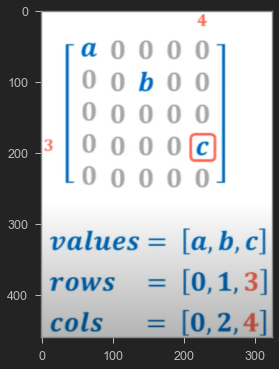

In [32]:
# On va alors enregistrer cette 'large' matrice dans 3 tableaux plus petits

## Un Premier tableau pour contenir les valeurs non nulles 

### Et un Second tableau pour enregistrer les lignes de ces valeurs 

#### Enfin un Troisième tableau pour enrigistrer les colonnes de ces valeurs 

image = plt.imread("Sparse_Matrix.png")
plt.figure(figsize=(15,6))
plt.imshow(image)

# Cela s'appel le format de stockage Coordinate (COO)

## Ce n'est pas exactement le format utilisé par Sklearn (mais le format Compressed Spar Row, CSR)

### C'est globalement la même chose, CSR est juste plus 'compressé'

In [33]:
# Si on effectue un encodage OneHot, on a ainsi le l'option de choisir le résultat doit être compressé ou non

## Il suffit alors de valider l'option sparse_output

encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(Y)

<4x3 sparse matrix of type '<class 'numpy.intc'>'
	with 4 stored elements in Compressed Sparse Row format>

####  OneHotEncoder

In [34]:
from sklearn.preprocessing import OneHotEncoder

# C'est d'ailleurs l'option par défautlt de la commande OneHotEncoder

## Cette commande permet l'encodage sur les X et cela sous entend donc une 'très très large' matrice

### Donc Sklearn décide de base de compresser le résultat avec un format CSR 


In [35]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

## Les 'transformer' de Normalisation

In [36]:
# Normaliser facilite grandement l'apprentissage des modèles de ML, qui sont basées sur :
## 1) La descente de grandient
## 2) Les calculs de distance
## 3) Les cacults de variances


### La normalisation 'MinMax'

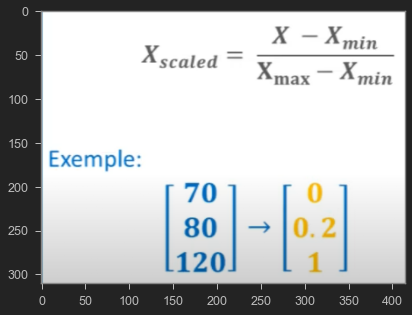

In [37]:
# Consiste à transformer chaque variable de sorte que ses valeurs soit comprises entre 0 et 1

## Pour ça, on soustrait chaque valeur d'une variable au minimum de cette variable 
## puis on soustrait par l'écart entre le le minimum et le maximum 

image = plt.imread('Min_Max.png')
plt.figure(figsize=(9,5))
plt.imshow(image)

In [38]:
from sklearn.preprocessing import MinMaxScaler

Y = np.array([[70],
             [80],
             [120]])

In [39]:
scaler = MinMaxScaler()
scaler.fit_transform(Y)

array([[0. ],
       [0.2],
       [1. ]])

In [40]:
# Magré le changement de valeur, on ne perd AUCUNE information, car la normalisation conserve le RAPPORT DE DISTANCE

## L'écart entre 0 et 0,2 est ainsi le même qu'entre 70 et 80 par rapport à 120


In [41]:
# On essaye toussa avec des fleurs

from sklearn.datasets import load_iris

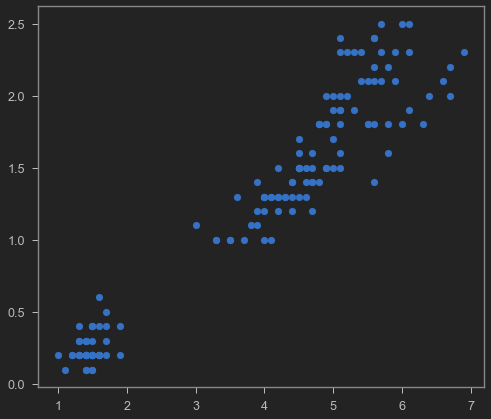

In [42]:
iris = load_iris()
X = iris.data

plt.scatter(X[:,2], X[:,3])

In [43]:
X_MinMax = MinMaxScaler().fit_transform(X)

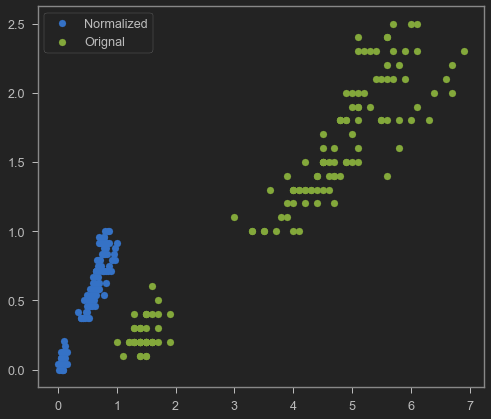

In [44]:
plt.scatter(X_MinMax[:,2], X_MinMax[:,3], label="Normalized")
plt.scatter(X[:,2], X[:,3], label='Orignal')
plt.legend()

### Standardisation

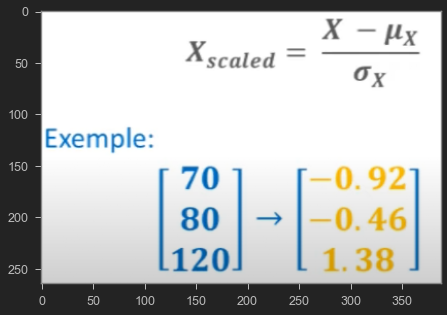

In [45]:
# Autre technique très utilisé en Machine Learning

## Consiste à transformer nos données de tel sorte que chaque variable est une moyenne égale à 0 et un écart type égale à 1

image = plt.imread('Standardized.png')
plt.figure(figsize=(9,5))
plt.imshow(image)

# On obtient ainsi des données très simples à utiliser pour la plupart des modèles statistiques, SVM, PCA, etc..

In [46]:
from sklearn.preprocessing import StandardScaler

Y = np.array([[70],
             [80],
             [120]])

In [47]:
scaler = StandardScaler()
scaler.fit_transform(Y)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

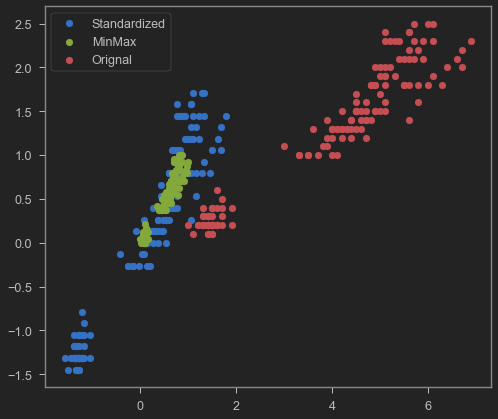

In [48]:
# On compare ces techniques en reprenant nos pitites fleurs
X_Stand = StandardScaler().fit_transform(X)

plt.scatter(X_Stand[:,2], X_Stand[:,3], label="Standardized")
plt.scatter(X_MinMax[:,2], X_MinMax[:,3], label="MinMax")
plt.scatter(X[:,2], X[:,3], label='Orignal')
plt.legend()

In [49]:
# Ces deux tecniques ont néanmoins un GROS INCONVENIENT :

## Elles sont sensibles aux valeurs abérrantes

### Il faut donc éviter d'utiliser ces données en présence d'Outliers !

#### On peut faire alors appel à un transformer très peu sensible aux outliers, RobustScaler 


### Le transformer RobustScaler 

In [50]:
from sklearn.preprocessing import RobustScaler

# Contrairement à la Normalisation, on ne soustrait pas no données à la moyenne de chaque variable

## A la place, on soustrait nos données à la médiane, qui est beaucoup moins sensible aux outliers 

### Ensuite, au lieux de diviser par un écart-type, on va diviser par l'inter-quartile de nos données, entre Q1 & Q3 = IQR


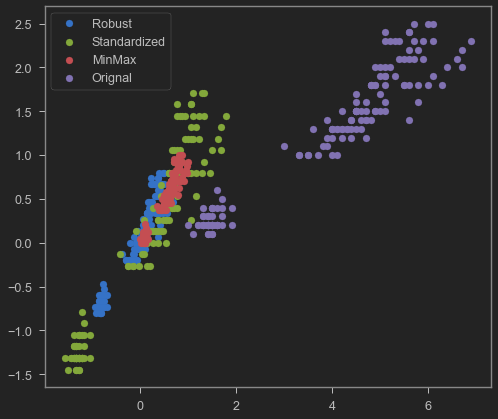

In [51]:
X_Robust = RobustScaler().fit_transform(X)

plt.scatter(X_Robust[:,2], X_Robust[:,3], label='Robust')
plt.scatter(X_Stand[:,2], X_Stand[:,3], label="Standardized")
plt.scatter(X_MinMax[:,2], X_MinMax[:,3], label="MinMax")
plt.scatter(X[:,2], X[:,3], label='Orignal')
plt.legend()

# Il permet ainsi d'opérer une normalisation de nos données sans pour autant déformer nos données à cause de certains outliers.

## Il existe d'autre 'transfomer de normalisation'

##### Normalizer

In [52]:
# Ne normalise pas les colonnes MAIS LES LIGNES de notre dataset

## Utile si on fait de natural language processing


## Les transforer de polynome ~ PolynomialFeatures

In [53]:
# Très utile pour créer des variables polynomiales 

## C'est ce qu'on appel faire du feature engineering 

### Ca permet de développer des modèles de Machine Learning plus riches et plus sophistiqués


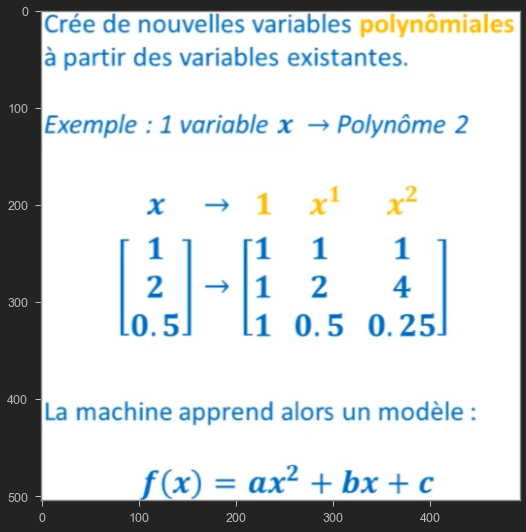

In [54]:
# Par exemple, on désire développer un modèle polynomiale de degrès de 2, à partir d'une seule variables X

## Le transformer va alors créer plusiseurs variables (une colonne de biais égale à 1, une colonne x et une colonne x^2)

### Ce qui permettra à notre machine de trouver les paramètres a,b & c d'un modèle polynomiale f(x) = ax^2 +bx + c

image = plt.imread('PolynomialFeatures.png')
plt.figure(figsize=(12,9))
plt.imshow(image)

# On peut alors déveloper des modèles plus sophistiqués

## Cela s'utilise surtout avec deux variables, le transformer créer alors toutes les combinaisons possibles

### On l'utilisera par exemple pour combiner la surface d'un appartement et son nombre de pièces

#### Le fait de créer une nouvelle variable va ainsi parfois nous permettre de développer des modèles plus performants

##### IMPORTANT : Penser à normaliser ses données après avoir utilisé polynomial feature

## Les opérations de transformations non-linéaire

### PowerTransformer & QuantileTransformer

In [55]:
# Ces deux transformers permettent de traiter nos données pour leur accorder une distribution plus normale ou Gaussienne

## Ce qui facilite une nouvelle fois l'apprentissage d'un certain nombre de modèle de ML

### Mais math un peu trop poussé


## Transformer de Discrétisation 

In [56]:
# Càd découper une variable continue en plusieurs parties

##  Ce type d'opération peut être très utile pour créer automatique des catégory dans une variable 


### Binarizer 

In [57]:
from sklearn.preprocessing import Binarizer

# Permet de diviser une variable en deux catégories selon un seuil que l'on définit dans le tranformer 


In [58]:
# Ici, toutes les valeurs inférieures ou égales à 80 seront mises à 0, et 1 sinon

np.hstack((Y, Binarizer(threshold=80).fit_transform(Y)))

array([[ 70,   0],
       [ 80,   0],
       [120,   1]])

### KBinsDiscretizer

In [59]:
from sklearn.preprocessing import KBinsDiscretizer

# Permet de faire exactement la même chose mais en découpant notre variable en plus de deux catégories 

In [60]:
KBinsDiscretizer(n_bins=3).fit_transform(Y).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Transformer Personnalisable ~ Function Transformer

In [61]:
# On peut rentrer n'importe quelle fonction et cela va vous retourner une fonction de transformation


# Dans la pratique, les 'transformer' de Pre_Processing

In [62]:
# On retiendra surtout : 

## Pour l'Encodage :

    # LabelEncoder()
    # OneHotEncoder()

## Pour la Normalisation :

    # MinMaxScaler()
    # StandardScaler()

    
###  Eventuellement : 
    
    # PolynomialFeatures()

# Combiner Transformers et Estiamteurs

In [63]:
# Il est mainteant temps de combiner Transformer et Estimateurs afin de créer des modèles de Machine Learning vraiment performants

## Pour cela nous allons utiliser une des classes lesp lus importantes, la classe "PipleLines"


## Pipeline 

In [64]:
# Lorsque l'on développe un modèle de Machine Learning on utilise en premier lieux les données du Train_Set pour développer 
# un ou plusieurs "Transformer"

## Ce qui nous permet de traiter ces données pour ensuite entraîner un "Estimateur"


In [65]:
# Une fois cette étape terminé, on utilise nos "Transformer" tels qu'ils ont été développer pour traiter les données du Test_Set. 

## Données que l'on peut ensuite fournir à notre "Estimateur" pour qu'il effectue ses prédictions 


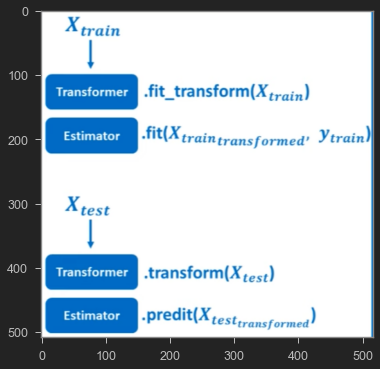

In [66]:
image = plt.imread('Transformer_Estimateur_Method.png')
plt.figure(figsize=(9,6))
plt.imshow(image)

In [67]:
# Voila ce que ca donnerait pour la bdd Iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [68]:
X = iris.data
y = iris.target

# On commence toujours par séparer nos données en Train & Test _ Set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 5)


In [69]:
# Etape 1 : Developer un Transformer 
scaler = StandardScaler()

# qui sert à traiter nos données du Train_Set
X_train_transformed = scaler.fit_transform(X_train)


In [70]:
# Etape 2 : Après quoi on peut développer notre estimateur, par exemple ici de la class SGD_Classifier
model = SGDClassifier(random_state=0)

# Que l'on va développer avec la méthode "fit".
model.fit(X_train_transformed, y_train)


SGDClassifier(random_state=0)

In [71]:
# Etape 3 : Si l'on souhaite utiliser notre modèle pour faire des prédictions sur le Test_Set, 

# On commence par transformer les données du Test_Set à l'aide de notre transformer dévelopé sur le Train_Set 
X_test_transformed = scaler.fit_transform(X_test)

# Puis on injecte ces données qui ont été transformées dans la méthode 'prédict' de notre modèle 
model.predict(X_test_transformed)


array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [72]:
# CEPENDDDANT, il existe une manière beaucoup plus simple d'écrire ce code 


## Transformer + Estimateur = Pipeline = Composite Estimator

In [73]:
# On peut combiner notre transformer et notre estimateur dans ce qu'on appel une "Pipeline" ~ une chaîne de transformation 

## On obtient alors un "estimateur composé"

### Il dispose, comme tous les autres estimateurs : 

    # 1) D'une métode 'Fit'
    # 2) D'une méthode 'Predict'
    # 3) D'une méthode 'Score'
    

In [74]:
from sklearn.pipeline import make_pipeline


In [75]:
model = make_pipeline(StandardScaler(),
                     SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

# On obtient alors, comme prévue, exactement le même résultat

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [76]:
 # Utiliser une "Pipeline" a plusieurs avantages : 
    
    # 1) Est plus simple à utiliser & à lire
    # 2) Evite d'avoir des fuites de données, ou des données mal transformées ~ C'est plus sécurisé 
    # 3) Permet de faire de la cross_validation sur l'ensemble de notre chaîne de transformation 
    #    Et qui dit Cross_Validation dit 'GridSearchCv' !
    #    On peut alors obtimiser TOUTE une chaîne de caractères avec GridSearchCV
    

## Pipelines & GridSeachCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [81]:
# Etape 1 : On créer notre 'Pipeline'

model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [82]:
# Etape 2 : On créer un dictionnaire de paramètres 

params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

In [83]:
# Etape 3 : On créer notre grille de recherche 

grid = GridSearchCV(model, param_grid=params, cv=4)


In [84]:
# Etape 4 : On utilise cette grille 

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [85]:
# Etape 5 : On regarde notre meilleur score, les paramètres associés, etc..

grid.best_score_

0.9916666666666667

In [86]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}